In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dataset.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [5]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
dataset['Item_Weight']=dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())
dataset['Outlet_Size']=dataset['Outlet_Size'].fillna('Medium')

In [7]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
dataset=dataset.drop('Item_Identifier',axis=1)

In [9]:
Mean_Visibility=dataset['Item_Visibility'].mean()
dataset['Item_Visibility']=dataset.apply(lambda x:x['Item_Visibility']//Mean_Visibility,axis=1)

In [10]:
dataset['Outlet_Establishment_Year']=2009-dataset['Outlet_Establishment_Year']
dataset['Outlet_Establishment_Year']=dataset['Outlet_Establishment_Year'].astype('category')

In [11]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [12]:
dataset.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Establishment_Year_2',
       'Outlet_Establishment_Year_5', 'Outlet_Establishment_Year_7',
       'Outlet_Establishment_Year_10', 'Outlet_Establishment_Year_11',
       'Outlet_Establishment_Year_12', 

In [13]:
colums=['Item_Visibility', 'Item_MRP', 
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_2',
       'Outlet_Establishment_Year_5', 'Outlet_Establishment_Year_7',
       'Outlet_Establishment_Year_10', 'Outlet_Establishment_Year_11',
       'Outlet_Establishment_Year_12', 'Outlet_Establishment_Year_22',
       'Outlet_Establishment_Year_24', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3','Item_Outlet_Sales']

In [14]:
df=pd.DataFrame(dataset,columns=colums)

In [15]:
X = df.iloc[:,:-1].values
Y = df['Item_Outlet_Sales'].values

In [16]:
##from sklearn.ensemble import RandomForestRegressor
## regressor = RandomForestRegressor(n_estimators = 300, random_state=2,max_depth=6,min_samples_split=6)
## regressor.fit(X, Y)

In [17]:
from xgboost import XGBRegressor
regressor=XGBRegressor(n_estimators=30,random_state=3,learning_rate=0.2,min_child_weight=3)
regressor.fit(X, Y)

[13:17:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=30,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
y_pred=regressor.predict(X)

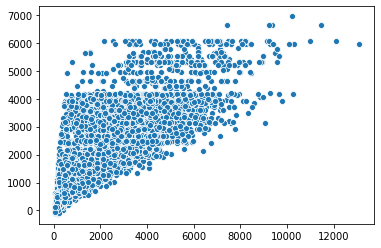

In [19]:
sns.scatterplot(x=Y,y=y_pred)

In [20]:
from sklearn import metrics
print("RMSE", np.sqrt(metrics.mean_squared_error(Y, y_pred)))

RMSE 1060.5661876394684


In [21]:
metrics.r2_score(Y,y_pred)

0.6137094151717601

In [22]:
df=pd.read_csv('test.csv')

In [23]:
df2=pd.DataFrame()
df2['Item_Identifier']=df['Item_Identifier']
df=df.drop('Item_Identifier',axis=1)

In [24]:
df2['Outlet_Identifier']=df['Outlet_Identifier']

In [25]:
Mean_Visibility=df['Item_Visibility'].mean()
df['Item_Visibility']=df.apply(lambda x:x['Item_Visibility']//Mean_Visibility,axis=1)

In [26]:
df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [27]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [28]:
df['Outlet_Establishment_Year']=2009-df['Outlet_Establishment_Year']
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].astype('category')

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
colums=['Item_Visibility', 'Item_MRP', 
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
        'Outlet_Establishment_Year_2',
       'Outlet_Establishment_Year_5', 'Outlet_Establishment_Year_7',
       'Outlet_Establishment_Year_10', 'Outlet_Establishment_Year_11',
       'Outlet_Establishment_Year_12', 'Outlet_Establishment_Year_22',
       'Outlet_Establishment_Year_24', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']

In [31]:
df=pd.DataFrame(df,columns=colums)

In [32]:
X = df.iloc[:, :].values

In [33]:
df2['Item_Outlet_Sales']=regressor.predict(X)

In [34]:
df2.to_csv('sub.csv',index=False)